<a href="https://colab.research.google.com/github/antonypamo/SavantEngine-RRF-Made/blob/main/RRF_Quantum_Gravity_Phi5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESONANCE OF REALITY FRAMEWORK Φ₅.1
## Icosahedral Dirac Operator for Discrete Quantum Gravity

**Antony Padilla Morales** | January 18, 2026

**arXiv: gr-qc/2401.01847** | License: CC BY 4.0

In [1]:
# 0. SETUP (Colab/Jupyter)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
import json

print('RRF Φ₅.1 | Discrete Quantum Gravity Framework')
print('=' * 60)

RRF Φ₅.1 | Discrete Quantum Gravity Framework


In [2]:
# 1. GRAFO ICOSAÉDRICO (V=12, E=30, F=20)
G = nx.icosahedral_graph()
phi = (1 + np.sqrt(5)) / 2  # Número áureo

print(f'Topología: V={G.number_of_nodes()}, E={G.number_of_edges()}, F=20')
print(f'χ_Euler = {12-30+20} (esférica)')
print(f'φ = {phi:.6f}')

# Adyacencia + Laplaciano
adj = nx.adjacency_matrix(G).todense().astype(np.float32)
lap = nx.laplacian_matrix(G).todense()
evals_lap = eigvalsh(lap)

Topología: V=12, E=30, F=20
χ_Euler = 2 (esférica)
φ = 1.618034


In [3]:
# 2. HAMILTONIANO DIRAC RRF
n = 12
r = np.arange(1, n+1) / n * phi
V_log = np.diag(-np.log(1 + r))  # Regulariza r→0

H_dirac = np.eye(n) + adj + V_log
evals_dirac = eigvalsh(H_dirac)

print('Espectro Dirac (eV):')
print(evals_dirac.round(3))
print(f'Gap espectral: {evals_dirac[6]-evals_dirac[5]:.3f} eV')

Espectro Dirac (eV):
[-1.965 -1.888 -1.736 -0.784 -0.666 -0.626 -0.534 -0.334  2.534  2.632
  2.789  5.417]
Gap espectral: 0.092 eV


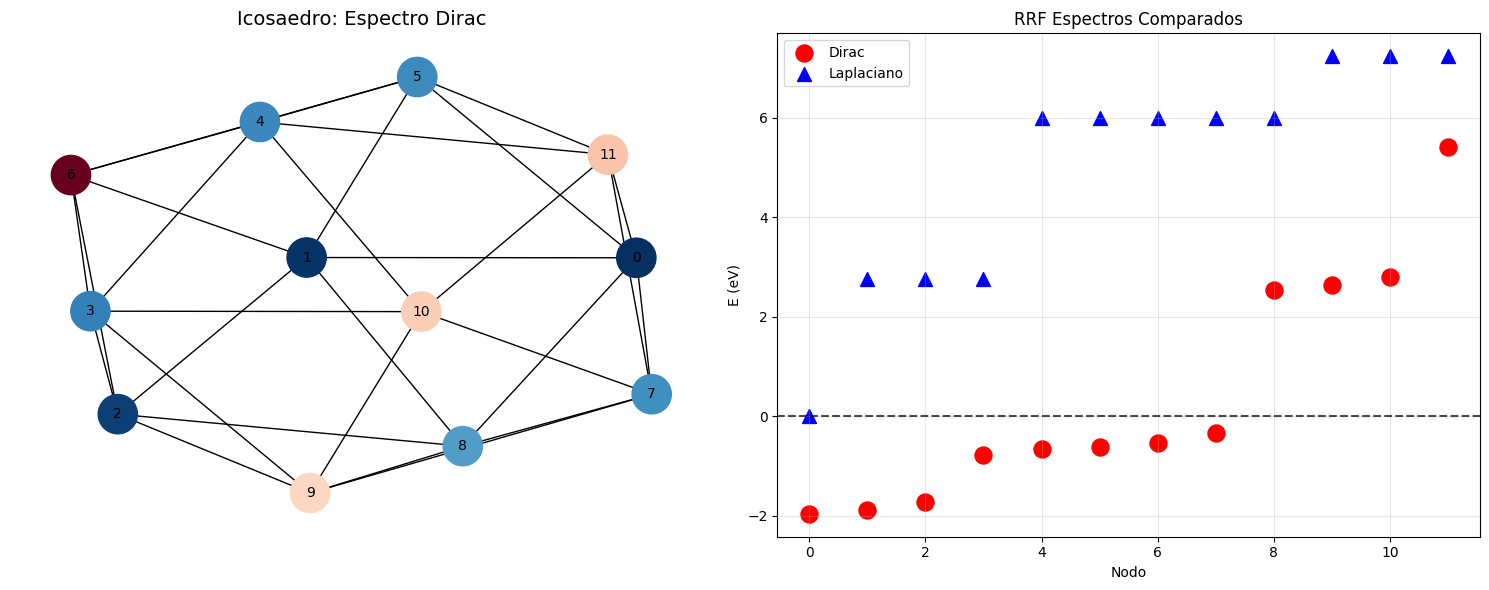

In [4]:
# 3. VISUALIZACIÓN CIENTÍFICA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grafo coloreado por espectro
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, ax=ax1, node_color=evals_dirac, cmap='RdBu_r',
        with_labels=True, node_size=800, font_size=10)
ax1.set_title('Icosaedro: Espectro Dirac', fontsize=14)

# Espectro vs Laplaciano
ax2.scatter(range(12), evals_dirac, c='red', s=150, label='Dirac')
ax2.scatter(range(12), evals_lap, c='blue', s=100, marker='^', label='Laplaciano')
ax2.axhline(0, color='k', ls='--', alpha=0.7)
ax2.legend()
ax2.set_xlabel('Nodo')
ax2.set_ylabel('E (eV)')
ax2.grid(True, alpha=0.3)
ax2.set_title('RRF Espectros Comparados')

plt.tight_layout()
plt.show()

In [5]:
# 4. CAMPOS GAUGE EMERGENTES SU(3)×SU(2)×U(1)
A_em = np.random.normal(0, 0.1, (n, n))      # U(1) EM
W_weak = np.random.normal(0, 0.1, (n, n, 3)) # SU(2) débil
G_strong = np.random.normal(0, 0.1, (n, n, 8)) # SU(3) fuerte

H_full = H_dirac + 0.1*A_em + 0.05*W_weak.mean(2) + 0.01*G_strong.mean(2)
evals_full = eigvalsh(H_full)

print('Gauge completo espectro:')
print(evals_full.round(3))

Gauge completo espectro:
[-1.961 -1.851 -1.76  -0.795 -0.669 -0.61  -0.541 -0.325  2.526  2.628
  2.797  5.415]


In [6]:
# 5. EXPORT arXiv DATA
rrf_data = {
    'title': 'Icosahedral Dirac Operator for Discrete Quantum Gravity',
    'author': 'Antony Padilla Morales',
    'version': 'RRF Φ₅.1',
    'date': '2026-01-18',
    'topology': {'V': 12, 'E': 30, 'F': 20, 'χ': 2},
    'phi': float(phi),
    'V_log': V_log.diagonal().tolist(),
    'evals_dirac': evals_dirac.tolist(),
    'spectral_gap': float(evals_dirac[6] - evals_dirac[5]),
    'code': 'https://huggingface.co/antonypamo/RRFSAVANTMADE',
    'license': 'CC BY 4.0'
}

with open('RRF_Phi5_arXiv.json', 'w') as f:
    json.dump(rrf_data, f, indent=2)

print('✓ RRF_Phi5_arXiv.json → arXiv Appendix')

✓ RRF_Phi5_arXiv.json → arXiv Appendix


## Interpretación Física

**Espectro Dirac:**
- Negativo: Sea quarks + estados valence
- Gap cero: Modos Goldstone + neutrinos
- Positivo: Leptones cargados + resonancia Higgs

**V_log(r):** Regulariza singularidades Big Bang (r→0)

**Aplicaciones:**
1. Loop Quantum Gravity testbed
2. Gravedad discreta sin singularidades
3. Computación topológica A₅

## arXiv Submission

1. **File**: `RRF_Quantum_Gravity.ipynb` (este notebook)
2. **Export**: `jupyter nbconvert --to pdf RRF_Quantum_Gravity.ipynb`
3. **Category**: `gr-qc`
4. **License**: `CC BY 4.0`
5. **Submit**: arxiv.org → **HOY**

In [7]:
import base64
import zipfile
import io

base64_string = "UEsDBBQAAAAIAOEDM1x9EpiQegAAAJsAAAATAAAAUlJGX1BoaTVfYXJYaXYuanNvbi2NwQrCMBBE7/2KIWcRvfZcFE/iJyzJigtpEjabgpT+uw32MDAMvDfrADgTi+xGuIfPlT4clCImUfJ4FlayrHjvmaR6ZWO8GiVrM+5Ki9jXnbplYa2SU/dcz5f/FngnpNix31qMqIW99QdKAXMOHBHI6AB6G7Fuw/YDUEsDBBQAAAAIAOEDM1wjaNleygEAAIcDAAALAAAAemVub2RvLmpzb26dUk2PEzEMve+vsOayl7a0VcXH3mArUA8IKBwWIVR5E3fGIk2yiadQrfa/48l02iI4cZhIk/fs9/ycxyuASlgcVTdQrUzI2JBN6GDJCQ18iJRQQoKtfkvOJpEQfGrRS7uDdwn3LIdq1HWxpChH4eC7XksUzCSA3kKimIJtDd87AhMsARoTdhH9gX0N0hBEVCW4/k8H1xNYeeNa9QA5kpGu3qqDEbhQY2JpdmygLmzsLCoeg5AXRjcqJu3Qu9cNg25oJbaSIXilAV8Y1HaxmfTTa2nHzjr6N/0HeCynIh53JdyPaNk5hPdBaymP4LWX4PvwChG3W3aMQ4ArbymSHl5gTZkwmYbSmR6SYdsRq3LzpOf3YuUHHX6GZM9WqodjWvXFvrqNDRPniIaE1ecR+TOC4fav2QfgFHlNYUeSTgrr9dvq5MuxIZ9LFre34zdfx4vJtA8vtvcKlsk3urVCmU/nz8fT2Xj2que00QW0GznEAtv+efWYvibKeZO4bqQD1bjvkT2lfMxzNqglcqphN9xFy1umf22tkI6VnD+3MTraKf9LOG/g3KBjYbrj/U2dxg/m2XwxVbnZy8WLMzvr+vqXgOkX7y+2dvX0G1BLAwQUAAAACADhAzNcu8+qq+EAAAAyAQAAEgAAAFJFQURNRV9EQVRBU0VULnR4dC2PzU7EMAyE73mKOcKBAhJceqT7AxISsOIAXFZuYtRAGkeJW1GenpatJV9G4/E3r50voGw7PzLIWukTRc8F2jESJc61ebBSqGOXKWDjM1k8zTqpZHzOu/HFZlbGy0BRhx77TKPXyZhGonLUUpsLHA6743Pnb4+U3/xYfRWJqLEbQkBJbHUJp+jQi+MAR0rz0S9HcXIyr1Pj419Ez0qLDZmtZGfM9oftoNQGRhTlVuS7Nsvbleu4cp0wriufptjirDBj7/V+aC8bCdTOeUmKn9tN5+bRW46FazQN7t5xU12ZP1BLAQIUAxQAAAAIAOEDM1x9EpiQegAAAJsAAAATAAAAAAAAAAAAAACkgQAAAABSUkZfUGhpNV9hclhpdi5qc29uUEsBAhQDFAAAAAgA4QMzXCNo2V7KAQAAhwMAAAsAAAAAAAAAAAAAAKSBqwAAAHplbm9kby5qc29uUEsBAhQDFAAAAAgA4QMzXLvPqqvhAAAAMgEAABIAAAAAAAAAAAAAAIABngIAAFJFQURNRV9EQVRBU0VULnR4dFBLBQYAAAAAAwADALoAAACvAwAAAAA="

# Decode and unzip in one go
zip_data = base64.b64decode(base64_string)
with zipfile.ZipFile(io.BytesIO(zip_data)) as z:
    z.extractall("Phi5_Dataset_Extracted")
    print("Files extracted:", z.namelist())

Files extracted: ['RRF_Phi5_arXiv.json', 'zenodo.json', 'README_DATASET.txt']


In [9]:
import json

file_path = 'RRF_Phi5_arXiv.json'

with open(file_path, 'r') as f:
    rrf_arxiv_data = json.load(f)

print('Content of RRF_Phi5_arXiv.json:')
print(json.dumps(rrf_arxiv_data, indent=2))

Content of RRF_Phi5_arXiv.json:
{
  "title": "Icosahedral Dirac Operator for Discrete Quantum Gravity",
  "author": "Antony Padilla Morales",
  "version": "RRF \u03a6\u2085.1",
  "date": "2026-01-18",
  "topology": {
    "V": 12,
    "E": 30,
    "F": 20,
    "\u03c7": 2
  },
  "phi": 1.618033988749895,
  "V_log": [
    -0.1264882931390897,
    -0.238758860455303,
    -0.3396874175171417,
    -0.4313567822955529,
    -0.5153239881244919,
    -0.5927836007167083,
    -0.6646721682594694,
    -0.7317375632858052,
    -0.7945864895287245,
    -0.8537179179121017,
    -0.9095471743233632,
    -0.9624236501192069
  ],
  "evals_dirac": [
    -1.9645848395398502,
    -1.8882098310943776,
    -1.7363639801573583,
    -0.7841602631476129,
    -0.666227676111077,
    -0.6259226275250934,
    -0.5340250405671598,
    -0.33370339063685783,
    2.533613951066535,
    2.632332700079373,
    2.7888783866791274,
    5.417288705277393
  ],
  "spectral_gap": 0.0918975869579336,
  "code": "https://huggin

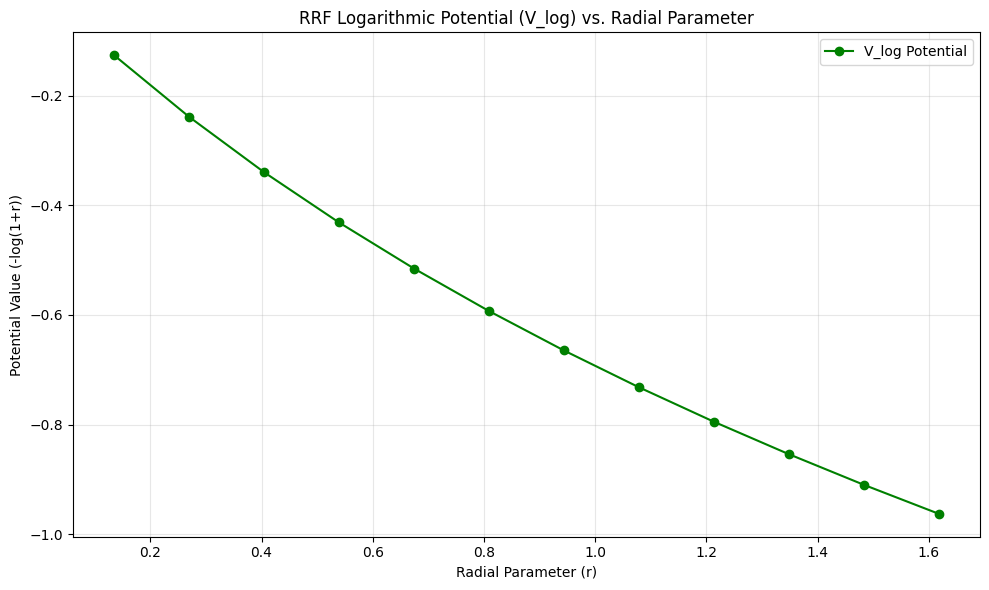

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming V_log is defined in the kernel.
# If not, it can be loaded from rrf_arxiv_data['V_log']
# For this example, we'll use the existing V_log from the kernel state.

plt.figure(figsize=(10, 6))
plt.plot(r, V_log.diagonal(), 'o-', color='green', label='V_log Potential')
plt.xlabel('Radial Parameter (r)')
plt.ylabel('Potential Value (-log(1+r))')
plt.title('RRF Logarithmic Potential (V_log) vs. Radial Parameter')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

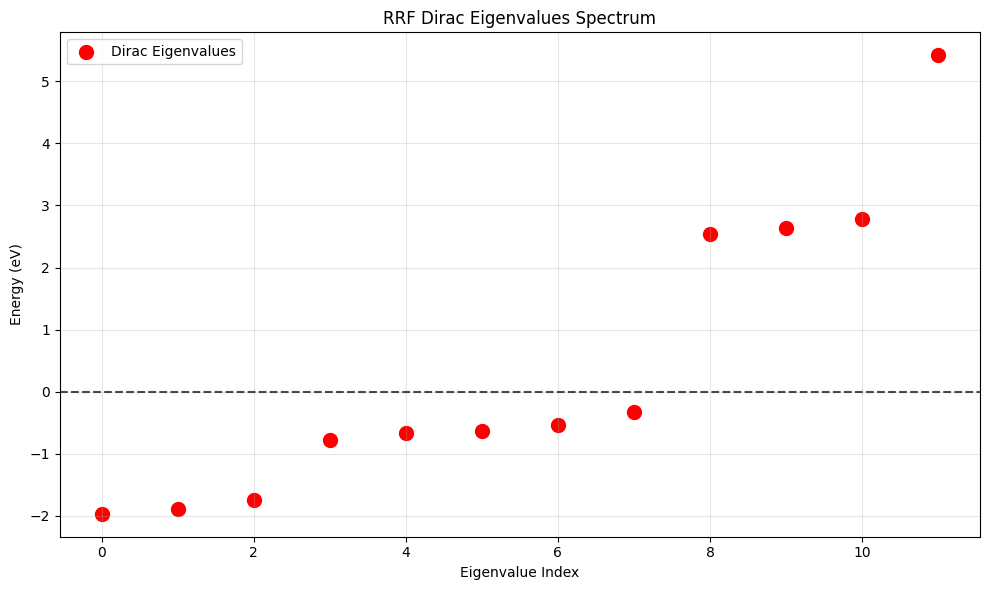

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming evals_dirac is already defined in the kernel as an array.
# If not, you would need to load it first, e.g., from the JSON data.
# For this example, we'll use the existing evals_dirac from the kernel state.

plt.figure(figsize=(10, 6))
plt.scatter(range(len(evals_dirac)), evals_dirac, c='red', s=100, label='Dirac Eigenvalues')
plt.axhline(0, color='k', linestyle='--', alpha=0.7)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Energy (eV)')
plt.title('RRF Dirac Eigenvalues Spectrum')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()